In [2]:
import os
import sys
import csv
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import glob
import math
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import models
from sklearn.svm import OneClassSVM
from deep_svdd import BaseSVDD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, UpSampling2D, Conv2D, Conv2DTranspose, MaxPooling2D, Reshape
from tensorflow.keras import optimizers
from tensorflow.keras.applications.efficientnet import decode_predictions
from efficientnet.tfkeras import EfficientNetB2, preprocess_input
import MVTecAD_loaddata as mv
import pandas as pd
acc=[]



*** Fitting of the SVDD model is completed. ***

running time         = 0.7061 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.3673
number of samples    = 209
number of features   = 196608
number of SVs        = 19
ratio of SVs         = 9.0909 %
accuracy             = 96.6507 %




*** Prediction of the provided data is completed. ***

running time         = 0.2522 seconds
number of samples    = 63
number of alarm      = 36
accuracy             = 57.1429 %




*** Prediction of the provided data is completed. ***

running time         = 0.1805 seconds
number of samples    = 20
number of alarm      = 1
accuracy             = 95.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2598 seconds
number of samples    = 83
number of alarm      = 37
accuracy             = 66.2651 %




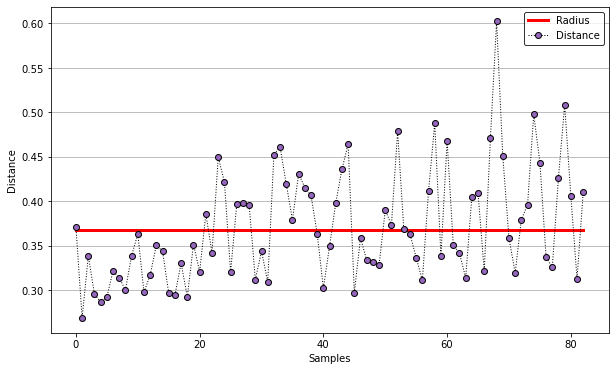



*** Fitting of the SVDD model is completed. ***

running time         = 0.8101 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.3673
number of samples    = 209
number of features   = 196608
number of SVs        = 19
ratio of SVs         = 9.0909 %
accuracy             = 96.6507 %




*** Prediction of the provided data is completed. ***

running time         = 0.2957 seconds
number of samples    = 63
number of alarm      = 36
accuracy             = 57.1429 %




*** Prediction of the provided data is completed. ***

running time         = 0.1875 seconds
number of samples    = 20
number of alarm      = 1
accuracy             = 95.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2946 seconds
number of samples    = 83
number of alarm      = 37
accuracy             = 66.2651 %




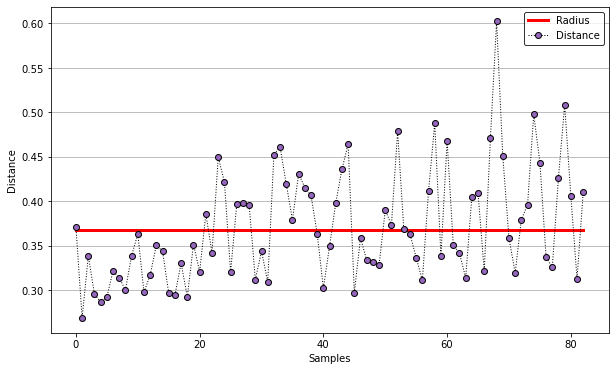



*** Fitting of the SVDD model is completed. ***

running time         = 0.6201 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.3673
number of samples    = 209
number of features   = 196608
number of SVs        = 19
ratio of SVs         = 9.0909 %
accuracy             = 96.6507 %




*** Prediction of the provided data is completed. ***

running time         = 0.2939 seconds
number of samples    = 63
number of alarm      = 36
accuracy             = 57.1429 %




*** Prediction of the provided data is completed. ***

running time         = 0.1849 seconds
number of samples    = 20
number of alarm      = 1
accuracy             = 95.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2686 seconds
number of samples    = 83
number of alarm      = 37
accuracy             = 66.2651 %




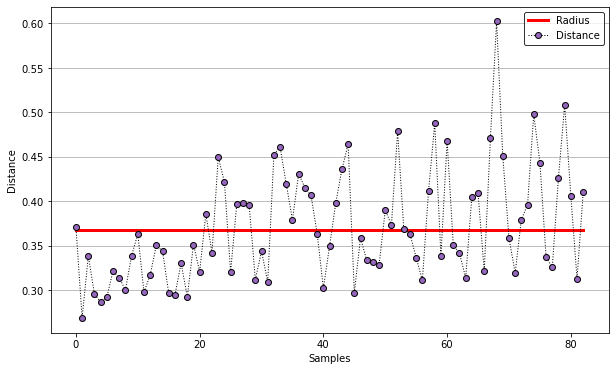



*** Fitting of the SVDD model is completed. ***

running time         = 0.6509 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.3673
number of samples    = 209
number of features   = 196608
number of SVs        = 19
ratio of SVs         = 9.0909 %
accuracy             = 96.6507 %




*** Prediction of the provided data is completed. ***

running time         = 0.2501 seconds
number of samples    = 63
number of alarm      = 36
accuracy             = 57.1429 %




*** Prediction of the provided data is completed. ***

running time         = 0.1829 seconds
number of samples    = 20
number of alarm      = 1
accuracy             = 95.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2682 seconds
number of samples    = 83
number of alarm      = 37
accuracy             = 66.2651 %




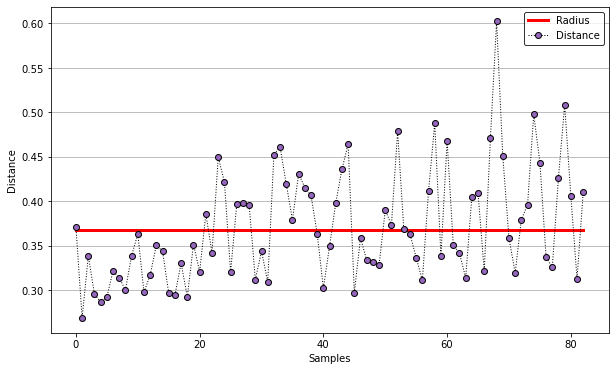



*** Fitting of the SVDD model is completed. ***

running time         = 0.5968 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.3673
number of samples    = 209
number of features   = 196608
number of SVs        = 19
ratio of SVs         = 9.0909 %
accuracy             = 96.6507 %




*** Prediction of the provided data is completed. ***

running time         = 0.3238 seconds
number of samples    = 63
number of alarm      = 36
accuracy             = 57.1429 %




*** Prediction of the provided data is completed. ***

running time         = 0.1855 seconds
number of samples    = 20
number of alarm      = 1
accuracy             = 95.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2753 seconds
number of samples    = 83
number of alarm      = 37
accuracy             = 66.2651 %




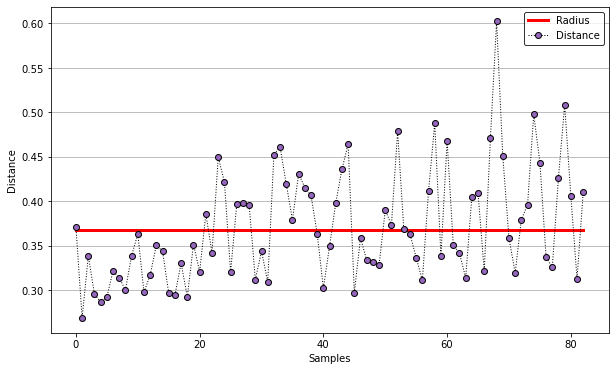

Wall time: 40.7 s


In [4]:
%%time
for num in range(5):
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test

    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))
    
    svdd = BaseSVDD(C=2**(-4), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 8
radius               = 0.7371
number of samples    = 224
number of features   = 196608
number of SVs        = 73
ratio of SVs         = 32.5893 %
accuracy             = 85.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.2840 seconds
number of samples    = 82
number of alarm      = 33
accuracy             = 40.2439 %




*** Prediction of the provided data is completed. ***

running time         = 0.2520 seconds
number of samples    = 58
number of alarm      = 7
accuracy             = 87.9310 %




*** Prediction of the provided data is completed. ***

running time         = 0.3917 seconds
number of samples    = 140
number of alarm      = 40
accuracy             = 60.0000 %




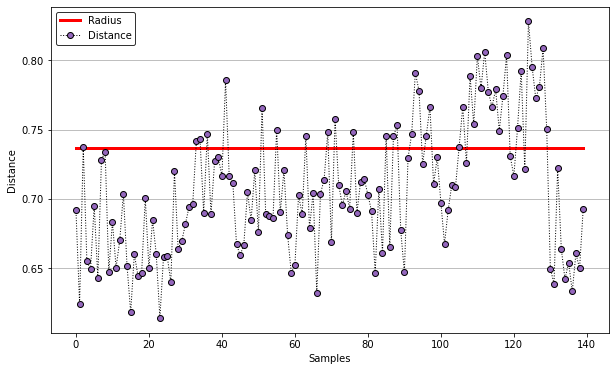



*** Fitting of the SVDD model is completed. ***

running time         = 0.6561 seconds
kernel function      = rbf
iterations           = 8
radius               = 0.7371
number of samples    = 224
number of features   = 196608
number of SVs        = 73
ratio of SVs         = 32.5893 %
accuracy             = 85.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3537 seconds
number of samples    = 82
number of alarm      = 33
accuracy             = 40.2439 %




*** Prediction of the provided data is completed. ***

running time         = 0.2742 seconds
number of samples    = 58
number of alarm      = 7
accuracy             = 87.9310 %




*** Prediction of the provided data is completed. ***

running time         = 0.3908 seconds
number of samples    = 140
number of alarm      = 40
accuracy             = 60.0000 %




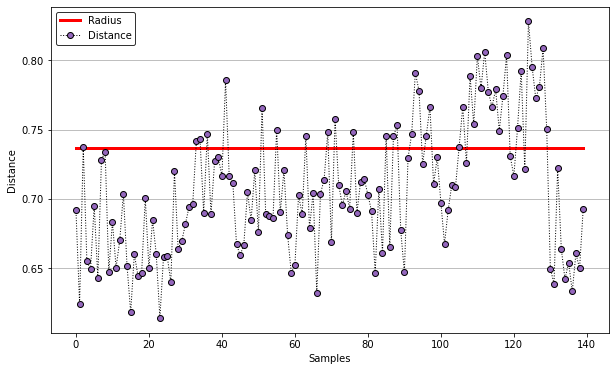



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 8
radius               = 0.7371
number of samples    = 224
number of features   = 196608
number of SVs        = 73
ratio of SVs         = 32.5893 %
accuracy             = 85.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.2789 seconds
number of samples    = 82
number of alarm      = 33
accuracy             = 40.2439 %




*** Prediction of the provided data is completed. ***

running time         = 0.2508 seconds
number of samples    = 58
number of alarm      = 7
accuracy             = 87.9310 %




*** Prediction of the provided data is completed. ***

running time         = 0.3749 seconds
number of samples    = 140
number of alarm      = 40
accuracy             = 60.0000 %




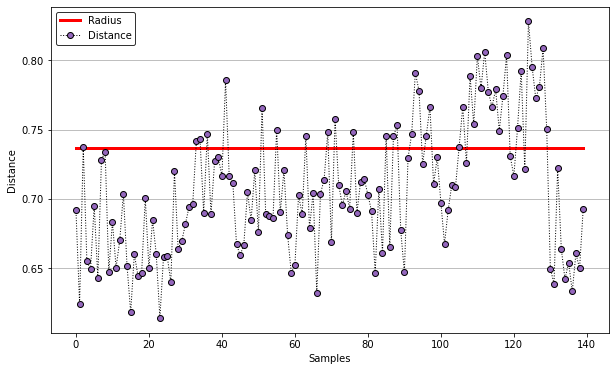



*** Fitting of the SVDD model is completed. ***

running time         = 0.7810 seconds
kernel function      = rbf
iterations           = 8
radius               = 0.7371
number of samples    = 224
number of features   = 196608
number of SVs        = 73
ratio of SVs         = 32.5893 %
accuracy             = 85.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.2815 seconds
number of samples    = 82
number of alarm      = 33
accuracy             = 40.2439 %




*** Prediction of the provided data is completed. ***

running time         = 0.2415 seconds
number of samples    = 58
number of alarm      = 7
accuracy             = 87.9310 %




*** Prediction of the provided data is completed. ***

running time         = 0.3679 seconds
number of samples    = 140
number of alarm      = 40
accuracy             = 60.0000 %




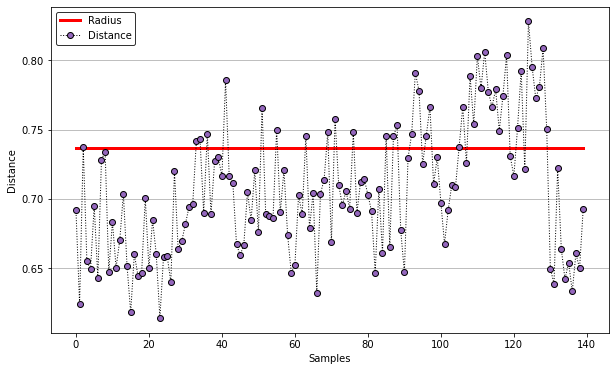



*** Fitting of the SVDD model is completed. ***

running time         = 0.7498 seconds
kernel function      = rbf
iterations           = 8
radius               = 0.7371
number of samples    = 224
number of features   = 196608
number of SVs        = 73
ratio of SVs         = 32.5893 %
accuracy             = 85.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.2821 seconds
number of samples    = 82
number of alarm      = 33
accuracy             = 40.2439 %




*** Prediction of the provided data is completed. ***

running time         = 0.2469 seconds
number of samples    = 58
number of alarm      = 7
accuracy             = 87.9310 %




*** Prediction of the provided data is completed. ***

running time         = 0.3801 seconds
number of samples    = 140
number of alarm      = 40
accuracy             = 60.0000 %




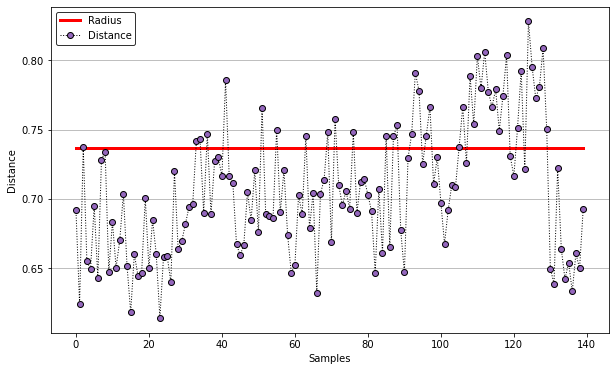

Wall time: 1min 1s


In [5]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-6), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.6561 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.6330
number of samples    = 219
number of features   = 196608
number of SVs        = 67
ratio of SVs         = 30.5936 %
accuracy             = 87.6712 %




*** Prediction of the provided data is completed. ***

running time         = 0.3312 seconds
number of samples    = 109
number of alarm      = 20
accuracy             = 18.3486 %




*** Prediction of the provided data is completed. ***

running time         = 0.1874 seconds
number of samples    = 23
number of alarm      = 4
accuracy             = 82.6087 %




*** Prediction of the provided data is completed. ***

running time         = 0.3649 seconds
number of samples    = 132
number of alarm      = 24
accuracy             = 29.5455 %




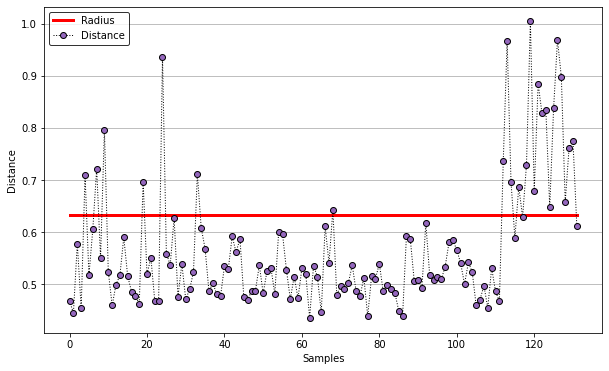



*** Fitting of the SVDD model is completed. ***

running time         = 0.7029 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.6330
number of samples    = 219
number of features   = 196608
number of SVs        = 67
ratio of SVs         = 30.5936 %
accuracy             = 87.6712 %




*** Prediction of the provided data is completed. ***

running time         = 0.3160 seconds
number of samples    = 109
number of alarm      = 20
accuracy             = 18.3486 %




*** Prediction of the provided data is completed. ***

running time         = 0.2088 seconds
number of samples    = 23
number of alarm      = 4
accuracy             = 82.6087 %




*** Prediction of the provided data is completed. ***

running time         = 0.3564 seconds
number of samples    = 132
number of alarm      = 24
accuracy             = 29.5455 %




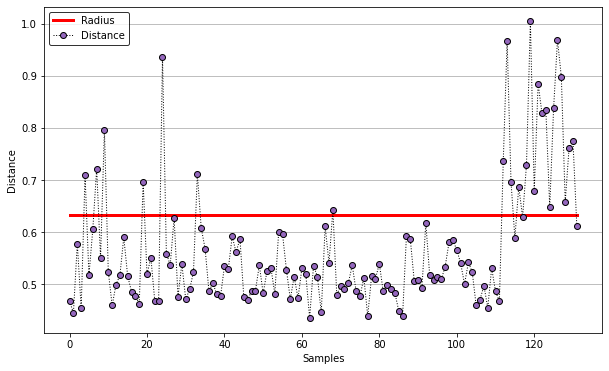



*** Fitting of the SVDD model is completed. ***

running time         = 0.6404 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.6330
number of samples    = 219
number of features   = 196608
number of SVs        = 67
ratio of SVs         = 30.5936 %
accuracy             = 87.6712 %




*** Prediction of the provided data is completed. ***

running time         = 0.3626 seconds
number of samples    = 109
number of alarm      = 20
accuracy             = 18.3486 %




*** Prediction of the provided data is completed. ***

running time         = 0.2072 seconds
number of samples    = 23
number of alarm      = 4
accuracy             = 82.6087 %




*** Prediction of the provided data is completed. ***

running time         = 0.3764 seconds
number of samples    = 132
number of alarm      = 24
accuracy             = 29.5455 %




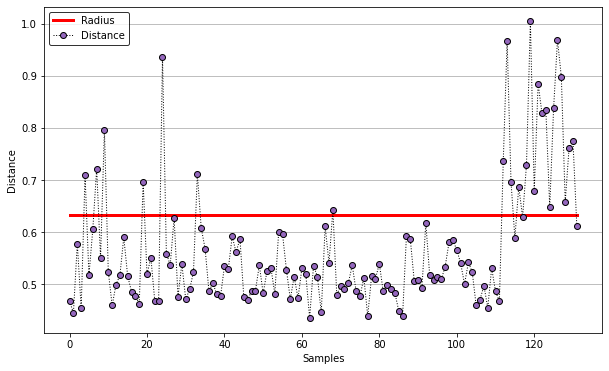



*** Fitting of the SVDD model is completed. ***

running time         = 0.7185 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.6330
number of samples    = 219
number of features   = 196608
number of SVs        = 67
ratio of SVs         = 30.5936 %
accuracy             = 87.6712 %




*** Prediction of the provided data is completed. ***

running time         = 0.3322 seconds
number of samples    = 109
number of alarm      = 20
accuracy             = 18.3486 %




*** Prediction of the provided data is completed. ***

running time         = 0.2031 seconds
number of samples    = 23
number of alarm      = 4
accuracy             = 82.6087 %




*** Prediction of the provided data is completed. ***

running time         = 0.3621 seconds
number of samples    = 132
number of alarm      = 24
accuracy             = 29.5455 %




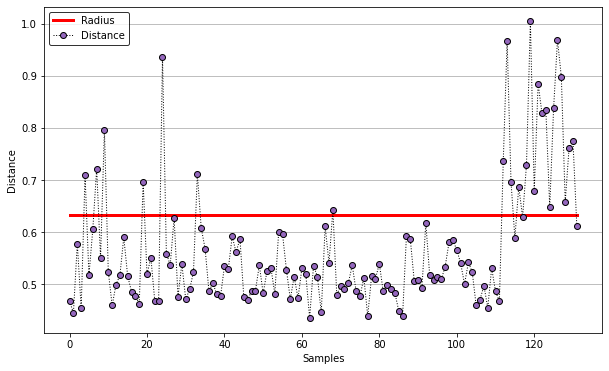



*** Fitting of the SVDD model is completed. ***

running time         = 0.6248 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.6330
number of samples    = 219
number of features   = 196608
number of SVs        = 67
ratio of SVs         = 30.5936 %
accuracy             = 87.6712 %




*** Prediction of the provided data is completed. ***

running time         = 0.3909 seconds
number of samples    = 109
number of alarm      = 20
accuracy             = 18.3486 %




*** Prediction of the provided data is completed. ***

running time         = 0.1875 seconds
number of samples    = 23
number of alarm      = 4
accuracy             = 82.6087 %




*** Prediction of the provided data is completed. ***

running time         = 0.3693 seconds
number of samples    = 132
number of alarm      = 24
accuracy             = 29.5455 %




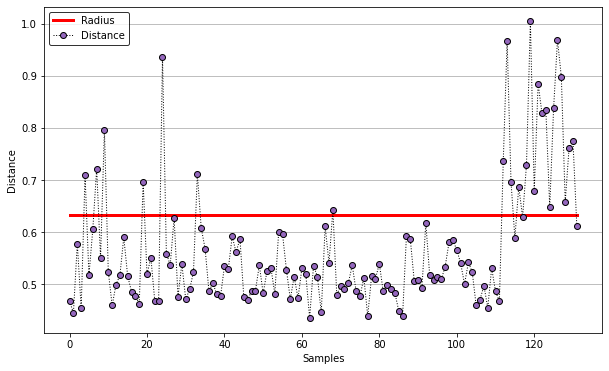

Wall time: 58.2 s


In [6]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-6), gamma=10**(-3), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 1.0401 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7196
number of samples    = 280
number of features   = 196608
number of SVs        = 158
ratio of SVs         = 56.4286 %
accuracy             = 81.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3703 seconds
number of samples    = 108
number of alarm      = 29
accuracy             = 26.8519 %




*** Prediction of the provided data is completed. ***

running time         = 0.2648 seconds
number of samples    = 28
number of alarm      = 8
accuracy             = 71.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3974 seconds
number of samples    = 136
number of alarm      = 37
accuracy             = 36.0294 %




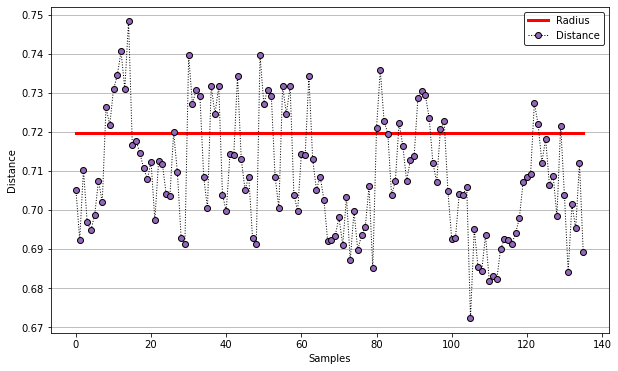

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 1.0126 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7196
number of samples    = 280
number of features   = 196608
number of SVs        = 158
ratio of SVs         = 56.4286 %
accuracy             = 81.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3798 seconds
number of samples    = 108
number of alarm      = 29
accuracy             = 26.8519 %




*** Prediction of the provided data is completed. ***

running time         = 0.2604 seconds
number of samples    = 28
number of alarm      = 8
accuracy             = 71.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.4220 seconds
number of samples    = 136
number of alarm      = 37
accuracy             = 36.0294 %




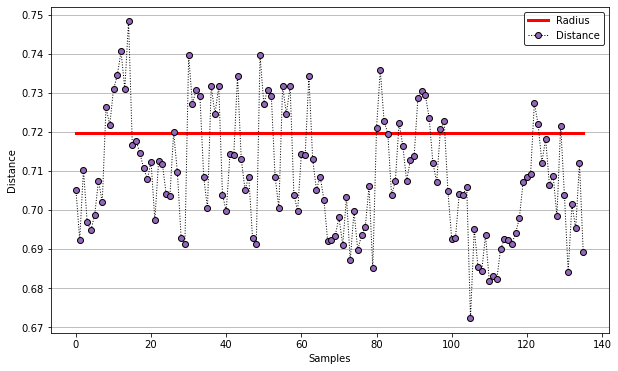

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 1.0385 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7196
number of samples    = 280
number of features   = 196608
number of SVs        = 158
ratio of SVs         = 56.4286 %
accuracy             = 81.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3828 seconds
number of samples    = 108
number of alarm      = 29
accuracy             = 26.8519 %




*** Prediction of the provided data is completed. ***

running time         = 0.2461 seconds
number of samples    = 28
number of alarm      = 8
accuracy             = 71.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3874 seconds
number of samples    = 136
number of alarm      = 37
accuracy             = 36.0294 %




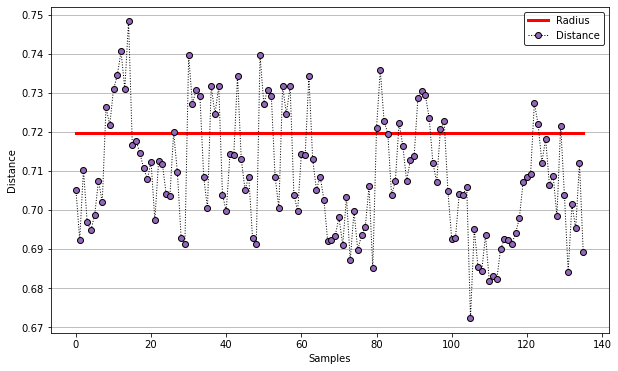

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 1.0131 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7196
number of samples    = 280
number of features   = 196608
number of SVs        = 158
ratio of SVs         = 56.4286 %
accuracy             = 81.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3798 seconds
number of samples    = 108
number of alarm      = 29
accuracy             = 26.8519 %




*** Prediction of the provided data is completed. ***

running time         = 0.2748 seconds
number of samples    = 28
number of alarm      = 8
accuracy             = 71.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3915 seconds
number of samples    = 136
number of alarm      = 37
accuracy             = 36.0294 %




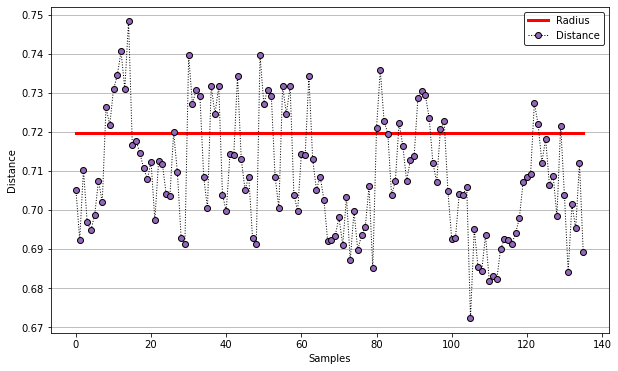

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 1.0138 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7196
number of samples    = 280
number of features   = 196608
number of SVs        = 158
ratio of SVs         = 56.4286 %
accuracy             = 81.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3808 seconds
number of samples    = 108
number of alarm      = 29
accuracy             = 26.8519 %




*** Prediction of the provided data is completed. ***

running time         = 0.2451 seconds
number of samples    = 28
number of alarm      = 8
accuracy             = 71.4286 %




*** Prediction of the provided data is completed. ***

running time         = 0.3892 seconds
number of samples    = 136
number of alarm      = 37
accuracy             = 36.0294 %




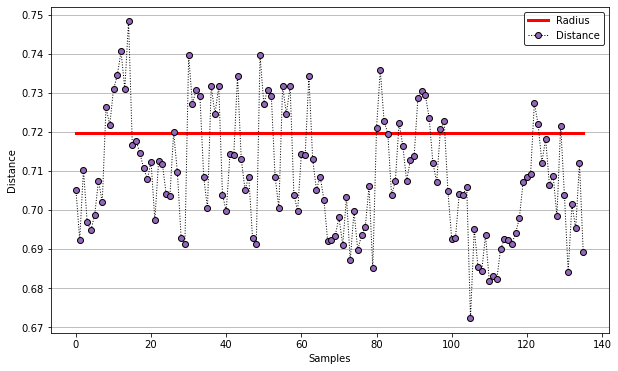

Wall time: 1min 17s


In [7]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))
    svdd = BaseSVDD(C=2**(-7), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.8904 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.8862
number of samples    = 264
number of features   = 196608
number of SVs        = 49
ratio of SVs         = 18.5606 %
accuracy             = 99.2424 %




*** Prediction of the provided data is completed. ***

running time         = 0.2800 seconds
number of samples    = 57
number of alarm      = 1
accuracy             = 1.7544 %




*** Prediction of the provided data is completed. ***

running time         = 0.2349 seconds
number of samples    = 21
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3111 seconds
number of samples    = 78
number of alarm      = 1
accuracy             = 28.2051 %




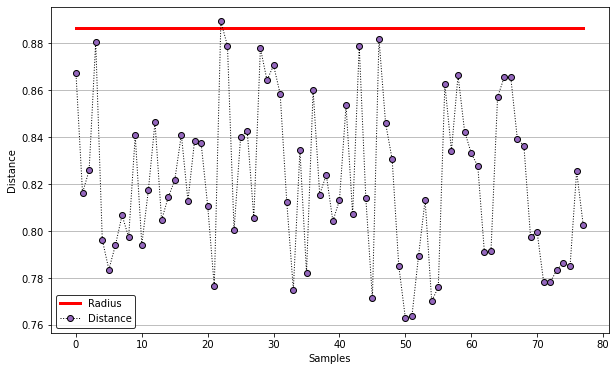



*** Fitting of the SVDD model is completed. ***

running time         = 0.8436 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.8862
number of samples    = 264
number of features   = 196608
number of SVs        = 49
ratio of SVs         = 18.5606 %
accuracy             = 99.2424 %




*** Prediction of the provided data is completed. ***

running time         = 0.2894 seconds
number of samples    = 57
number of alarm      = 1
accuracy             = 1.7544 %




*** Prediction of the provided data is completed. ***

running time         = 0.2346 seconds
number of samples    = 21
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2983 seconds
number of samples    = 78
number of alarm      = 1
accuracy             = 28.2051 %




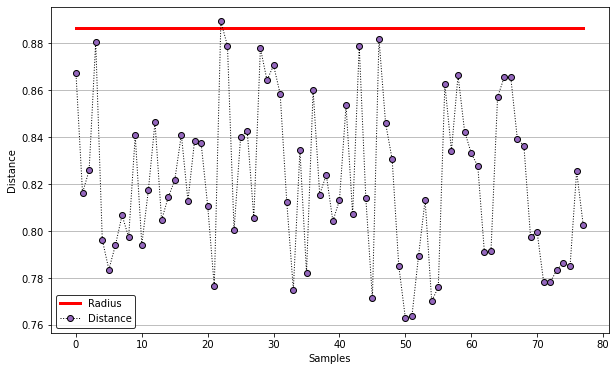



*** Fitting of the SVDD model is completed. ***

running time         = 0.8748 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.8862
number of samples    = 264
number of features   = 196608
number of SVs        = 49
ratio of SVs         = 18.5606 %
accuracy             = 99.2424 %




*** Prediction of the provided data is completed. ***

running time         = 0.2876 seconds
number of samples    = 57
number of alarm      = 1
accuracy             = 1.7544 %




*** Prediction of the provided data is completed. ***

running time         = 0.2264 seconds
number of samples    = 21
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2905 seconds
number of samples    = 78
number of alarm      = 1
accuracy             = 28.2051 %




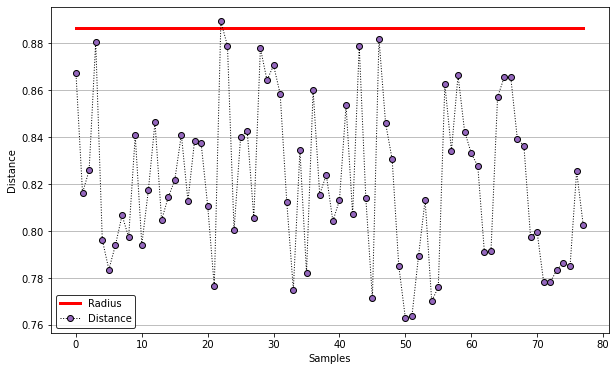



*** Fitting of the SVDD model is completed. ***

running time         = 0.8279 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.8862
number of samples    = 264
number of features   = 196608
number of SVs        = 49
ratio of SVs         = 18.5606 %
accuracy             = 99.2424 %




*** Prediction of the provided data is completed. ***

running time         = 0.2721 seconds
number of samples    = 57
number of alarm      = 1
accuracy             = 1.7544 %




*** Prediction of the provided data is completed. ***

running time         = 0.2405 seconds
number of samples    = 21
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3070 seconds
number of samples    = 78
number of alarm      = 1
accuracy             = 28.2051 %




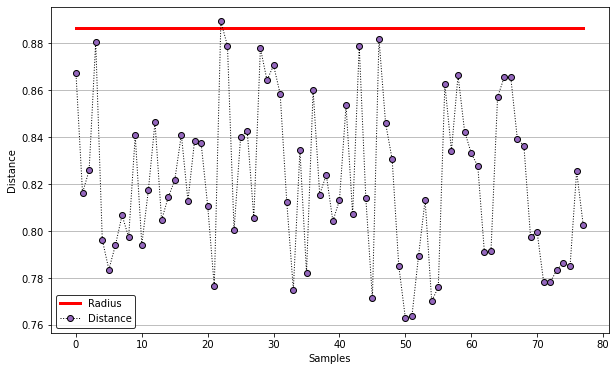



*** Fitting of the SVDD model is completed. ***

running time         = 0.8904 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.8862
number of samples    = 264
number of features   = 196608
number of SVs        = 49
ratio of SVs         = 18.5606 %
accuracy             = 99.2424 %




*** Prediction of the provided data is completed. ***

running time         = 0.2720 seconds
number of samples    = 57
number of alarm      = 1
accuracy             = 1.7544 %




*** Prediction of the provided data is completed. ***

running time         = 0.2362 seconds
number of samples    = 21
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3282 seconds
number of samples    = 78
number of alarm      = 1
accuracy             = 28.2051 %




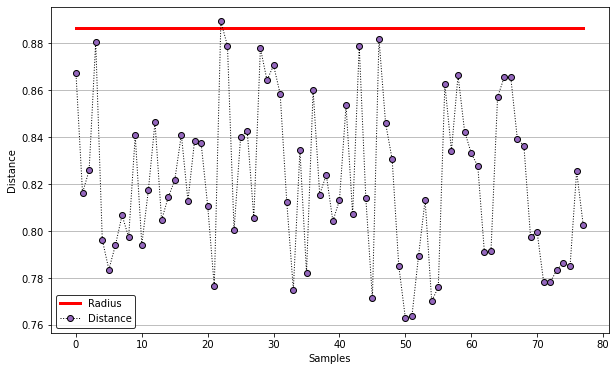

Wall time: 48 s


In [8]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-4), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 1.3122 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.1329
number of samples    = 391
number of features   = 196608
number of SVs        = 66
ratio of SVs         = 16.8798 %
accuracy             = 92.8389 %




*** Prediction of the provided data is completed. ***

running time         = 0.4330 seconds
number of samples    = 70
number of alarm      = 18
accuracy             = 25.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3401 seconds
number of samples    = 40
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.4576 seconds
number of samples    = 110
number of alarm      = 18
accuracy             = 52.7273 %




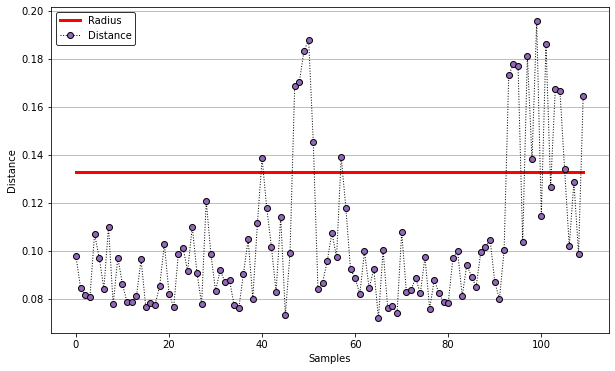



*** Fitting of the SVDD model is completed. ***

running time         = 1.6715 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.1329
number of samples    = 391
number of features   = 196608
number of SVs        = 66
ratio of SVs         = 16.8798 %
accuracy             = 92.8389 %




*** Prediction of the provided data is completed. ***

running time         = 0.4807 seconds
number of samples    = 70
number of alarm      = 18
accuracy             = 25.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3567 seconds
number of samples    = 40
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.5397 seconds
number of samples    = 110
number of alarm      = 18
accuracy             = 52.7273 %




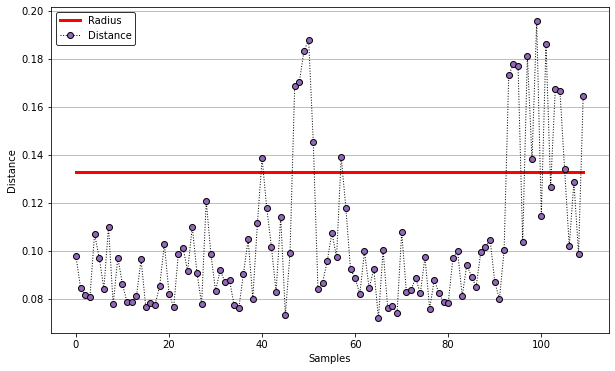



*** Fitting of the SVDD model is completed. ***

running time         = 1.3903 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.1329
number of samples    = 391
number of features   = 196608
number of SVs        = 66
ratio of SVs         = 16.8798 %
accuracy             = 92.8389 %




*** Prediction of the provided data is completed. ***

running time         = 0.3693 seconds
number of samples    = 70
number of alarm      = 18
accuracy             = 25.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3522 seconds
number of samples    = 40
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.4438 seconds
number of samples    = 110
number of alarm      = 18
accuracy             = 52.7273 %




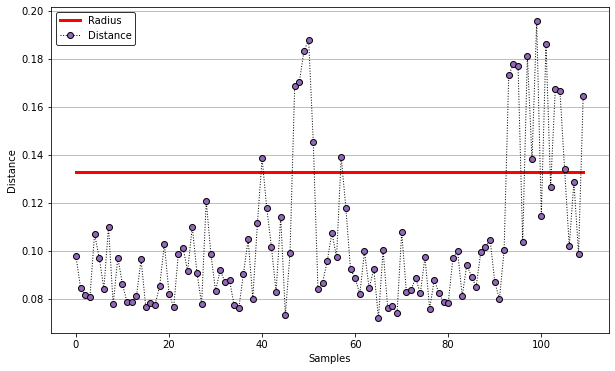



*** Fitting of the SVDD model is completed. ***

running time         = 1.4371 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.1329
number of samples    = 391
number of features   = 196608
number of SVs        = 66
ratio of SVs         = 16.8798 %
accuracy             = 92.8389 %




*** Prediction of the provided data is completed. ***

running time         = 0.3610 seconds
number of samples    = 70
number of alarm      = 18
accuracy             = 25.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3361 seconds
number of samples    = 40
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.4575 seconds
number of samples    = 110
number of alarm      = 18
accuracy             = 52.7273 %




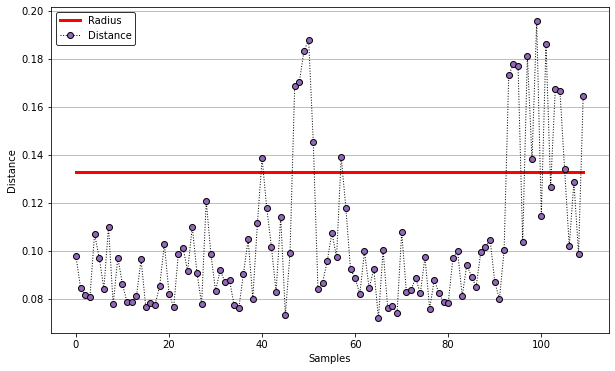



*** Fitting of the SVDD model is completed. ***

running time         = 1.4059 seconds
kernel function      = rbf
iterations           = 14
radius               = 0.1329
number of samples    = 391
number of features   = 196608
number of SVs        = 66
ratio of SVs         = 16.8798 %
accuracy             = 92.8389 %




*** Prediction of the provided data is completed. ***

running time         = 0.3699 seconds
number of samples    = 70
number of alarm      = 18
accuracy             = 25.7143 %




*** Prediction of the provided data is completed. ***

running time         = 0.3374 seconds
number of samples    = 40
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.4419 seconds
number of samples    = 110
number of alarm      = 18
accuracy             = 52.7273 %




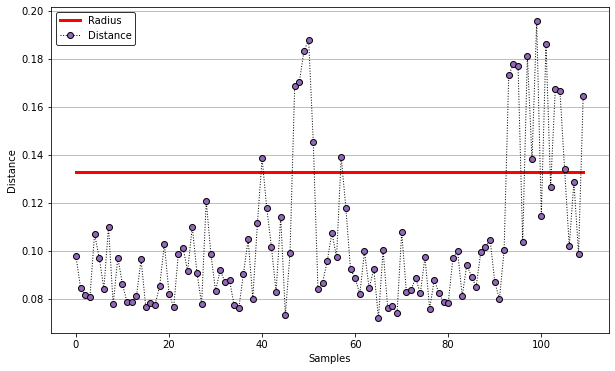

Wall time: 1min 37s


In [9]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-6), gamma=10**(-5), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.3064
number of samples    = 245
number of features   = 196608
number of SVs        = 16
ratio of SVs         = 6.5306 %
accuracy             = 99.5918 %




*** Prediction of the provided data is completed. ***

running time         = 0.3128 seconds
number of samples    = 92
number of alarm      = 67
accuracy             = 72.8261 %




*** Prediction of the provided data is completed. ***

running time         = 0.2397 seconds
number of samples    = 32
number of alarm      = 32
accuracy             = 0.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3566 seconds
number of samples    = 124
number of alarm      = 99
accuracy             = 54.0323 %




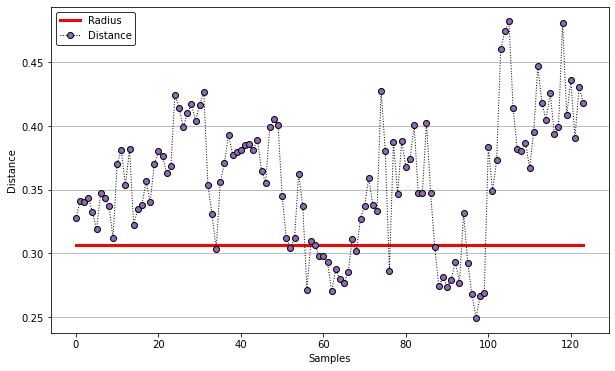



*** Fitting of the SVDD model is completed. ***

running time         = 0.7810 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.3064
number of samples    = 245
number of features   = 196608
number of SVs        = 16
ratio of SVs         = 6.5306 %
accuracy             = 99.5918 %




*** Prediction of the provided data is completed. ***

running time         = 0.3214 seconds
number of samples    = 92
number of alarm      = 67
accuracy             = 72.8261 %




*** Prediction of the provided data is completed. ***

running time         = 0.2429 seconds
number of samples    = 32
number of alarm      = 32
accuracy             = 0.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3713 seconds
number of samples    = 124
number of alarm      = 99
accuracy             = 54.0323 %




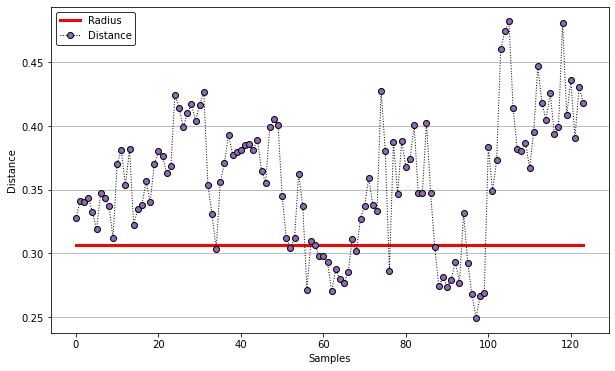



*** Fitting of the SVDD model is completed. ***

running time         = 0.8748 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.3064
number of samples    = 245
number of features   = 196608
number of SVs        = 16
ratio of SVs         = 6.5306 %
accuracy             = 99.5918 %




*** Prediction of the provided data is completed. ***

running time         = 0.3863 seconds
number of samples    = 92
number of alarm      = 67
accuracy             = 72.8261 %




*** Prediction of the provided data is completed. ***

running time         = 0.2595 seconds
number of samples    = 32
number of alarm      = 32
accuracy             = 0.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.4215 seconds
number of samples    = 124
number of alarm      = 99
accuracy             = 54.0323 %




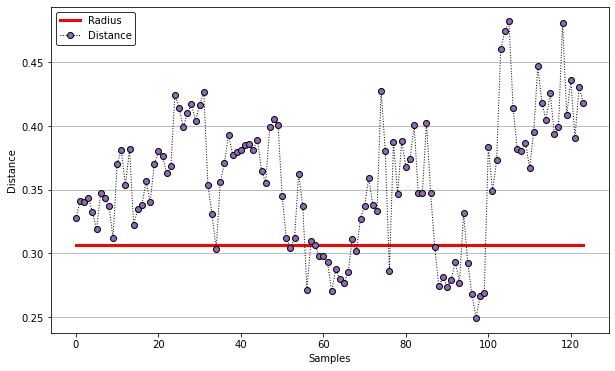



*** Fitting of the SVDD model is completed. ***

running time         = 0.7498 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.3064
number of samples    = 245
number of features   = 196608
number of SVs        = 16
ratio of SVs         = 6.5306 %
accuracy             = 99.5918 %




*** Prediction of the provided data is completed. ***

running time         = 0.3182 seconds
number of samples    = 92
number of alarm      = 67
accuracy             = 72.8261 %




*** Prediction of the provided data is completed. ***

running time         = 0.2356 seconds
number of samples    = 32
number of alarm      = 32
accuracy             = 0.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3768 seconds
number of samples    = 124
number of alarm      = 99
accuracy             = 54.0323 %




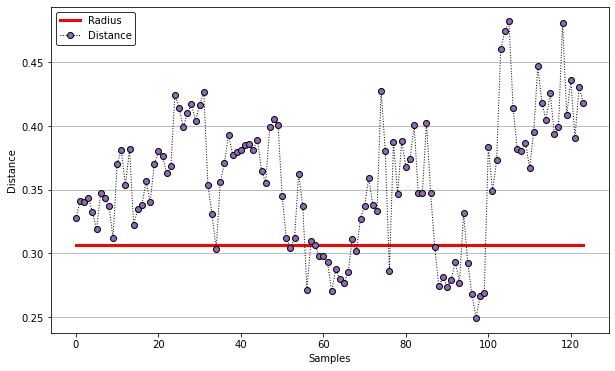



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.3064
number of samples    = 245
number of features   = 196608
number of SVs        = 16
ratio of SVs         = 6.5306 %
accuracy             = 99.5918 %




*** Prediction of the provided data is completed. ***

running time         = 0.3159 seconds
number of samples    = 92
number of alarm      = 67
accuracy             = 72.8261 %




*** Prediction of the provided data is completed. ***

running time         = 0.2276 seconds
number of samples    = 32
number of alarm      = 32
accuracy             = 0.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3564 seconds
number of samples    = 124
number of alarm      = 99
accuracy             = 54.0323 %




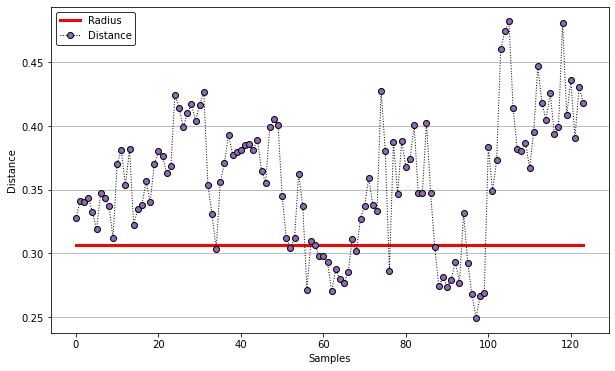

Wall time: 1min 1s


In [10]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-2), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.7030 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6656
number of samples    = 220
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 11.8182 %
accuracy             = 88.6364 %




*** Prediction of the provided data is completed. ***

running time         = 0.2866 seconds
number of samples    = 93
number of alarm      = 5
accuracy             = 5.3763 %




*** Prediction of the provided data is completed. ***

running time         = 0.1874 seconds
number of samples    = 22
number of alarm      = 2
accuracy             = 90.9091 %




*** Prediction of the provided data is completed. ***

running time         = 0.3450 seconds
number of samples    = 115
number of alarm      = 7
accuracy             = 21.7391 %




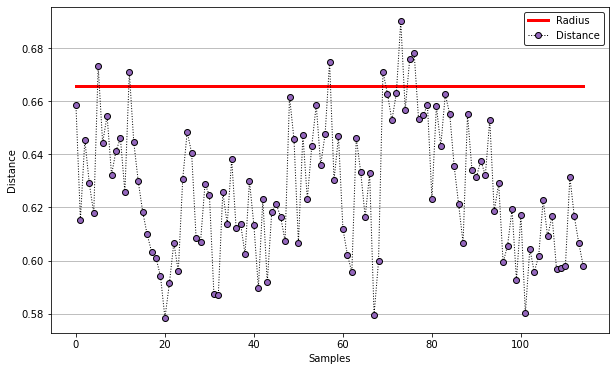



*** Fitting of the SVDD model is completed. ***

running time         = 0.6717 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6656
number of samples    = 220
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 11.8182 %
accuracy             = 88.6364 %




*** Prediction of the provided data is completed. ***

running time         = 0.3068 seconds
number of samples    = 93
number of alarm      = 5
accuracy             = 5.3763 %




*** Prediction of the provided data is completed. ***

running time         = 0.2077 seconds
number of samples    = 22
number of alarm      = 2
accuracy             = 90.9091 %




*** Prediction of the provided data is completed. ***

running time         = 0.3262 seconds
number of samples    = 115
number of alarm      = 7
accuracy             = 21.7391 %




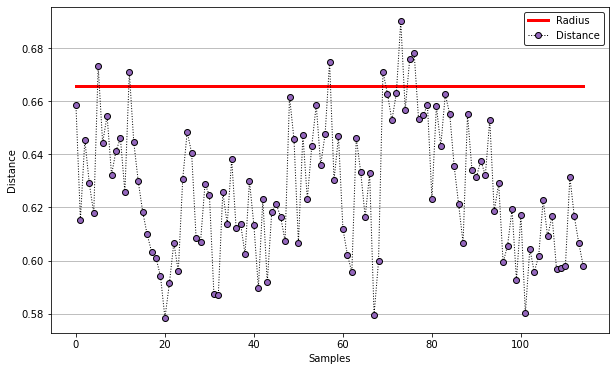



*** Fitting of the SVDD model is completed. ***

running time         = 0.6717 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6656
number of samples    = 220
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 11.8182 %
accuracy             = 88.6364 %




*** Prediction of the provided data is completed. ***

running time         = 0.3016 seconds
number of samples    = 93
number of alarm      = 5
accuracy             = 5.3763 %




*** Prediction of the provided data is completed. ***

running time         = 0.1875 seconds
number of samples    = 22
number of alarm      = 2
accuracy             = 90.9091 %




*** Prediction of the provided data is completed. ***

running time         = 0.4028 seconds
number of samples    = 115
number of alarm      = 7
accuracy             = 21.7391 %




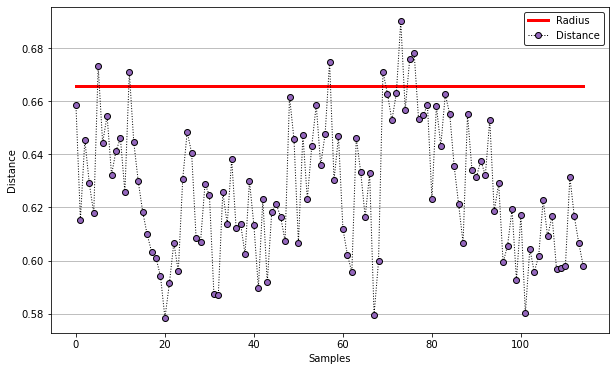



*** Fitting of the SVDD model is completed. ***

running time         = 0.6248 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6656
number of samples    = 220
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 11.8182 %
accuracy             = 88.6364 %




*** Prediction of the provided data is completed. ***

running time         = 0.3119 seconds
number of samples    = 93
number of alarm      = 5
accuracy             = 5.3763 %




*** Prediction of the provided data is completed. ***

running time         = 0.1875 seconds
number of samples    = 22
number of alarm      = 2
accuracy             = 90.9091 %




*** Prediction of the provided data is completed. ***

running time         = 0.3299 seconds
number of samples    = 115
number of alarm      = 7
accuracy             = 21.7391 %




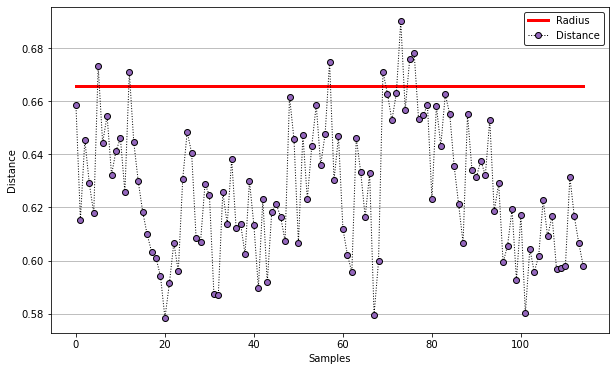



*** Fitting of the SVDD model is completed. ***

running time         = 0.6873 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6656
number of samples    = 220
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 11.8182 %
accuracy             = 88.6364 %




*** Prediction of the provided data is completed. ***

running time         = 0.2973 seconds
number of samples    = 93
number of alarm      = 5
accuracy             = 5.3763 %




*** Prediction of the provided data is completed. ***

running time         = 0.1875 seconds
number of samples    = 22
number of alarm      = 2
accuracy             = 90.9091 %




*** Prediction of the provided data is completed. ***

running time         = 0.3448 seconds
number of samples    = 115
number of alarm      = 7
accuracy             = 21.7391 %




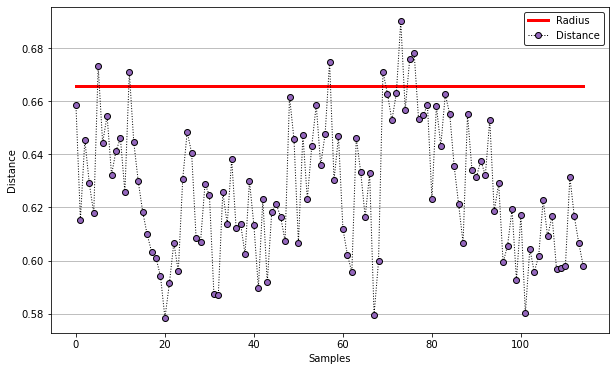

Wall time: 38.2 s


In [11]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-2), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.9217 seconds
kernel function      = poly
iterations           = 8
radius               = 2.5513
number of samples    = 267
number of features   = 196608
number of SVs        = 18
ratio of SVs         = 6.7416 %
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2353 seconds
number of samples    = 141
number of alarm      = 23
accuracy             = 16.3121 %




*** Prediction of the provided data is completed. ***

running time         = 0.1190 seconds
number of samples    = 26
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3089 seconds
number of samples    = 167
number of alarm      = 23
accuracy             = 29.3413 %




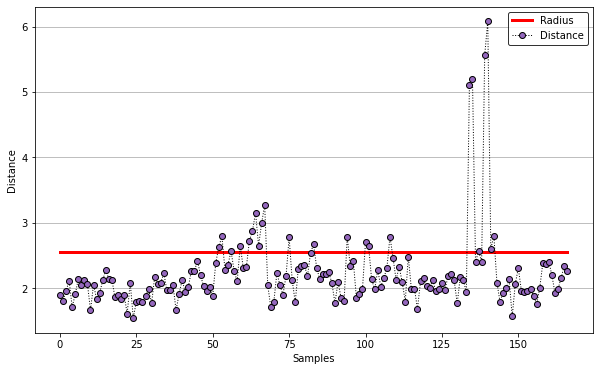



*** Fitting of the SVDD model is completed. ***

running time         = 0.9685 seconds
kernel function      = poly
iterations           = 8
radius               = 2.5513
number of samples    = 267
number of features   = 196608
number of SVs        = 18
ratio of SVs         = 6.7416 %
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2626 seconds
number of samples    = 141
number of alarm      = 23
accuracy             = 16.3121 %




*** Prediction of the provided data is completed. ***

running time         = 0.1250 seconds
number of samples    = 26
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3114 seconds
number of samples    = 167
number of alarm      = 23
accuracy             = 29.3413 %




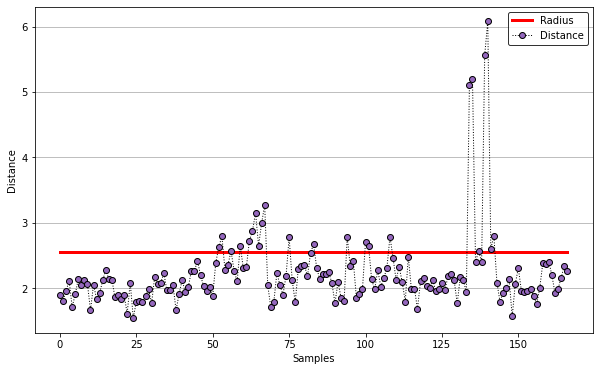



*** Fitting of the SVDD model is completed. ***

running time         = 0.9217 seconds
kernel function      = poly
iterations           = 8
radius               = 2.5513
number of samples    = 267
number of features   = 196608
number of SVs        = 18
ratio of SVs         = 6.7416 %
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2409 seconds
number of samples    = 141
number of alarm      = 23
accuracy             = 16.3121 %




*** Prediction of the provided data is completed. ***

running time         = 0.1264 seconds
number of samples    = 26
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2971 seconds
number of samples    = 167
number of alarm      = 23
accuracy             = 29.3413 %




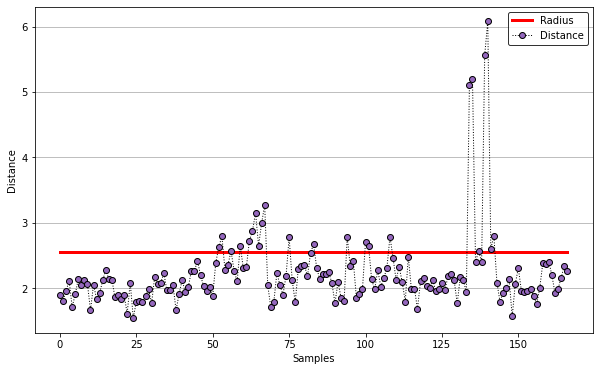



*** Fitting of the SVDD model is completed. ***

running time         = 0.9216 seconds
kernel function      = poly
iterations           = 8
radius               = 2.5513
number of samples    = 267
number of features   = 196608
number of SVs        = 18
ratio of SVs         = 6.7416 %
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2488 seconds
number of samples    = 141
number of alarm      = 23
accuracy             = 16.3121 %




*** Prediction of the provided data is completed. ***

running time         = 0.1174 seconds
number of samples    = 26
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2957 seconds
number of samples    = 167
number of alarm      = 23
accuracy             = 29.3413 %




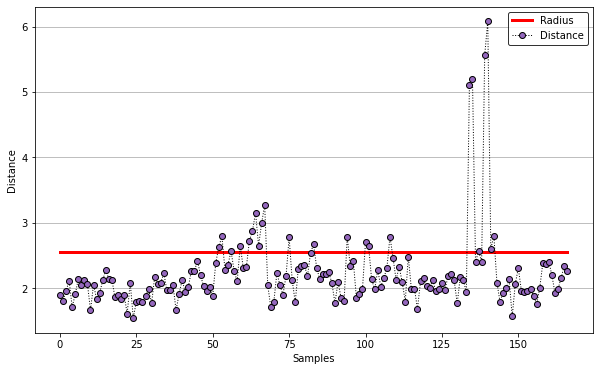



*** Fitting of the SVDD model is completed. ***

running time         = 0.9060 seconds
kernel function      = poly
iterations           = 8
radius               = 2.5513
number of samples    = 267
number of features   = 196608
number of SVs        = 18
ratio of SVs         = 6.7416 %
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2614 seconds
number of samples    = 141
number of alarm      = 23
accuracy             = 16.3121 %




*** Prediction of the provided data is completed. ***

running time         = 0.1250 seconds
number of samples    = 26
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2676 seconds
number of samples    = 167
number of alarm      = 23
accuracy             = 29.3413 %




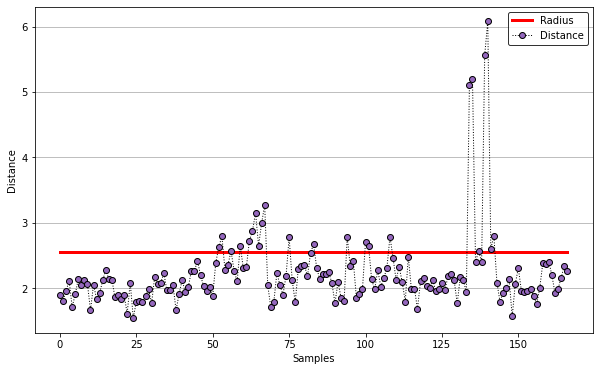

Wall time: 55.7 s


In [12]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-2), degree=5, kernel='poly', coef0=1, display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 1.3689 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6601
number of samples    = 320
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 8.1250 %
accuracy             = 96.5625 %




*** Prediction of the provided data is completed. ***

running time         = 0.4361 seconds
number of samples    = 119
number of alarm      = 4
accuracy             = 3.3613 %




*** Prediction of the provided data is completed. ***

running time         = 0.3087 seconds
number of samples    = 41
number of alarm      = 26
accuracy             = 36.5854 %




*** Prediction of the provided data is completed. ***

running time         = 0.4988 seconds
number of samples    = 160
number of alarm      = 30
accuracy             = 11.8750 %




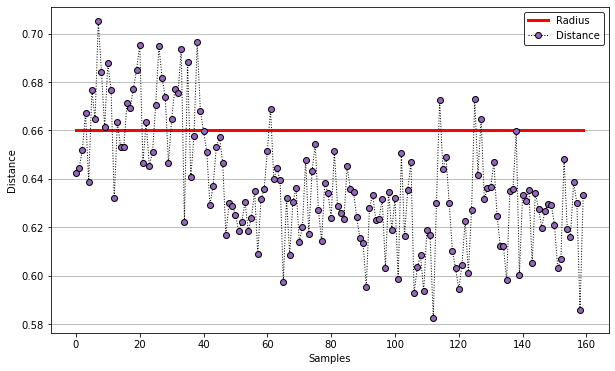



*** Fitting of the SVDD model is completed. ***

running time         = 1.1716 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6601
number of samples    = 320
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 8.1250 %
accuracy             = 96.5625 %




*** Prediction of the provided data is completed. ***

running time         = 0.4276 seconds
number of samples    = 119
number of alarm      = 4
accuracy             = 3.3613 %




*** Prediction of the provided data is completed. ***

running time         = 0.2926 seconds
number of samples    = 41
number of alarm      = 26
accuracy             = 36.5854 %




*** Prediction of the provided data is completed. ***

running time         = 0.5035 seconds
number of samples    = 160
number of alarm      = 30
accuracy             = 11.8750 %




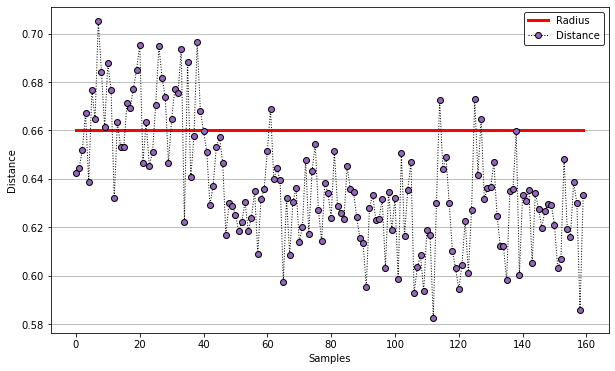



*** Fitting of the SVDD model is completed. ***

running time         = 1.1716 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6601
number of samples    = 320
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 8.1250 %
accuracy             = 96.5625 %




*** Prediction of the provided data is completed. ***

running time         = 0.4026 seconds
number of samples    = 119
number of alarm      = 4
accuracy             = 3.3613 %




*** Prediction of the provided data is completed. ***

running time         = 0.2927 seconds
number of samples    = 41
number of alarm      = 26
accuracy             = 36.5854 %




*** Prediction of the provided data is completed. ***

running time         = 0.4871 seconds
number of samples    = 160
number of alarm      = 30
accuracy             = 11.8750 %




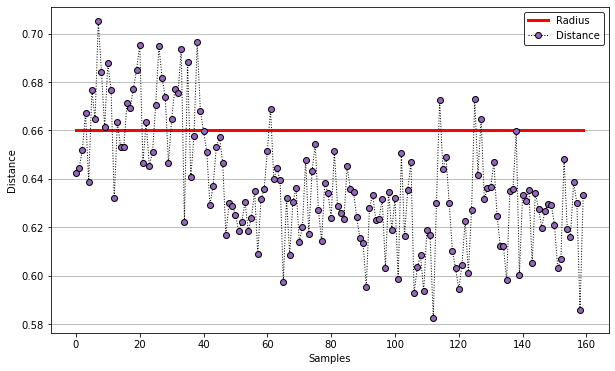



*** Fitting of the SVDD model is completed. ***

running time         = 1.2340 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6601
number of samples    = 320
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 8.1250 %
accuracy             = 96.5625 %




*** Prediction of the provided data is completed. ***

running time         = 0.3935 seconds
number of samples    = 119
number of alarm      = 4
accuracy             = 3.3613 %




*** Prediction of the provided data is completed. ***

running time         = 0.3067 seconds
number of samples    = 41
number of alarm      = 26
accuracy             = 36.5854 %




*** Prediction of the provided data is completed. ***

running time         = 0.4723 seconds
number of samples    = 160
number of alarm      = 30
accuracy             = 11.8750 %




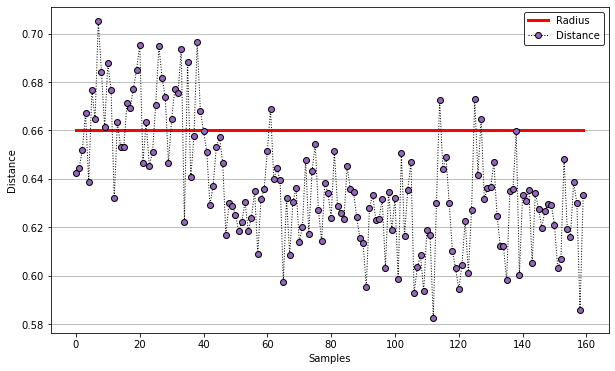



*** Fitting of the SVDD model is completed. ***

running time         = 1.1560 seconds
kernel function      = rbf
iterations           = 11
radius               = 0.6601
number of samples    = 320
number of features   = 196608
number of SVs        = 26
ratio of SVs         = 8.1250 %
accuracy             = 96.5625 %




*** Prediction of the provided data is completed. ***

running time         = 0.4031 seconds
number of samples    = 119
number of alarm      = 4
accuracy             = 3.3613 %




*** Prediction of the provided data is completed. ***

running time         = 0.2925 seconds
number of samples    = 41
number of alarm      = 26
accuracy             = 36.5854 %




*** Prediction of the provided data is completed. ***

running time         = 0.4714 seconds
number of samples    = 160
number of alarm      = 30
accuracy             = 11.8750 %




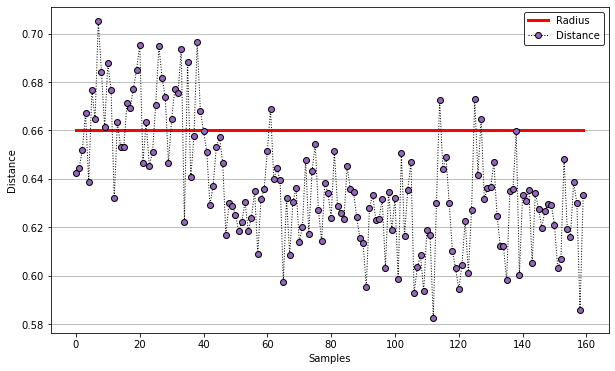

Wall time: 1min 13s


In [13]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-0), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7348
number of samples    = 230
number of features   = 196608
number of SVs        = 43
ratio of SVs         = 18.6957 %
accuracy             = 83.4783 %




*** Prediction of the provided data is completed. ***

running time         = 0.2936 seconds
number of samples    = 84
number of alarm      = 20
accuracy             = 23.8095 %




*** Prediction of the provided data is completed. ***

running time         = 0.2262 seconds
number of samples    = 33
number of alarm      = 2
accuracy             = 93.9394 %




*** Prediction of the provided data is completed. ***

running time         = 0.3550 seconds
number of samples    = 117
number of alarm      = 22
accuracy             = 43.5897 %




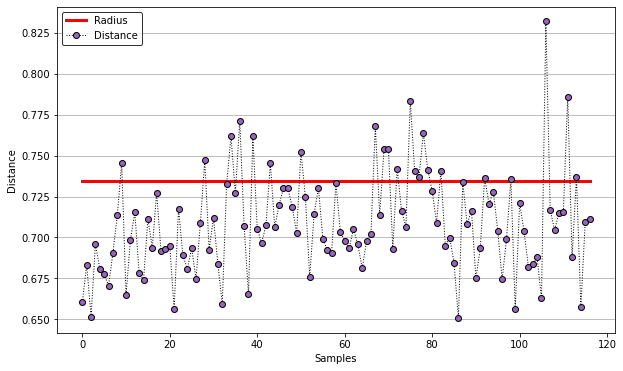



*** Fitting of the SVDD model is completed. ***

running time         = 0.7029 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7348
number of samples    = 230
number of features   = 196608
number of SVs        = 43
ratio of SVs         = 18.6957 %
accuracy             = 83.4783 %




*** Prediction of the provided data is completed. ***

running time         = 0.3250 seconds
number of samples    = 84
number of alarm      = 20
accuracy             = 23.8095 %




*** Prediction of the provided data is completed. ***

running time         = 0.2173 seconds
number of samples    = 33
number of alarm      = 2
accuracy             = 93.9394 %




*** Prediction of the provided data is completed. ***

running time         = 0.3651 seconds
number of samples    = 117
number of alarm      = 22
accuracy             = 43.5897 %




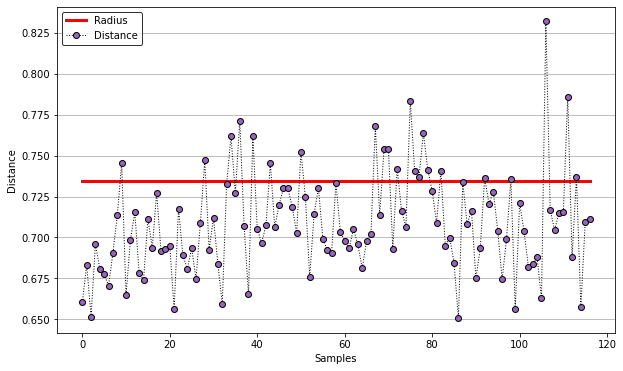



*** Fitting of the SVDD model is completed. ***

running time         = 0.7029 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7348
number of samples    = 230
number of features   = 196608
number of SVs        = 43
ratio of SVs         = 18.6957 %
accuracy             = 83.4783 %




*** Prediction of the provided data is completed. ***

running time         = 0.2997 seconds
number of samples    = 84
number of alarm      = 20
accuracy             = 23.8095 %




*** Prediction of the provided data is completed. ***

running time         = 0.2234 seconds
number of samples    = 33
number of alarm      = 2
accuracy             = 93.9394 %




*** Prediction of the provided data is completed. ***

running time         = 0.3275 seconds
number of samples    = 117
number of alarm      = 22
accuracy             = 43.5897 %




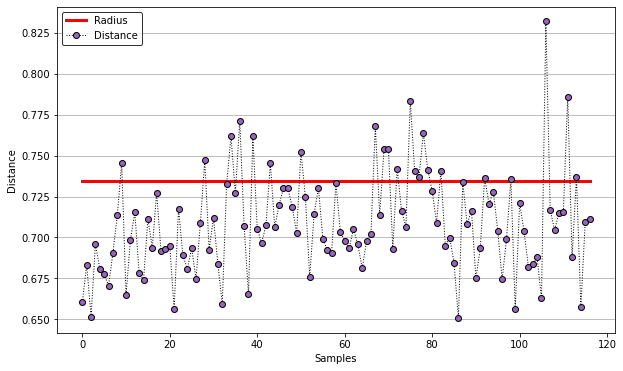



*** Fitting of the SVDD model is completed. ***

running time         = 0.7185 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7348
number of samples    = 230
number of features   = 196608
number of SVs        = 43
ratio of SVs         = 18.6957 %
accuracy             = 83.4783 %




*** Prediction of the provided data is completed. ***

running time         = 0.2945 seconds
number of samples    = 84
number of alarm      = 20
accuracy             = 23.8095 %




*** Prediction of the provided data is completed. ***

running time         = 0.2341 seconds
number of samples    = 33
number of alarm      = 2
accuracy             = 93.9394 %




*** Prediction of the provided data is completed. ***

running time         = 0.3329 seconds
number of samples    = 117
number of alarm      = 22
accuracy             = 43.5897 %




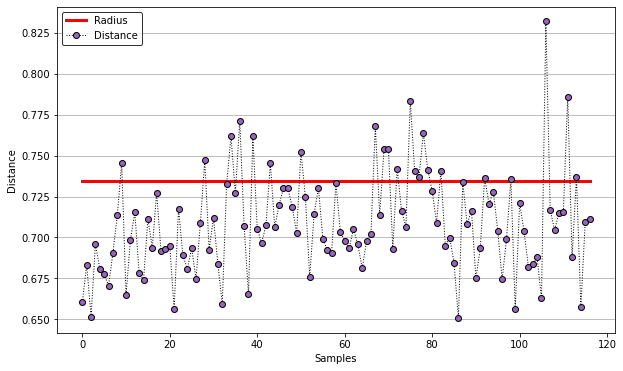



*** Fitting of the SVDD model is completed. ***

running time         = 0.7342 seconds
kernel function      = rbf
iterations           = 9
radius               = 0.7348
number of samples    = 230
number of features   = 196608
number of SVs        = 43
ratio of SVs         = 18.6957 %
accuracy             = 83.4783 %




*** Prediction of the provided data is completed. ***

running time         = 0.2952 seconds
number of samples    = 84
number of alarm      = 20
accuracy             = 23.8095 %




*** Prediction of the provided data is completed. ***

running time         = 0.2225 seconds
number of samples    = 33
number of alarm      = 2
accuracy             = 93.9394 %




*** Prediction of the provided data is completed. ***

running time         = 0.3419 seconds
number of samples    = 117
number of alarm      = 22
accuracy             = 43.5897 %




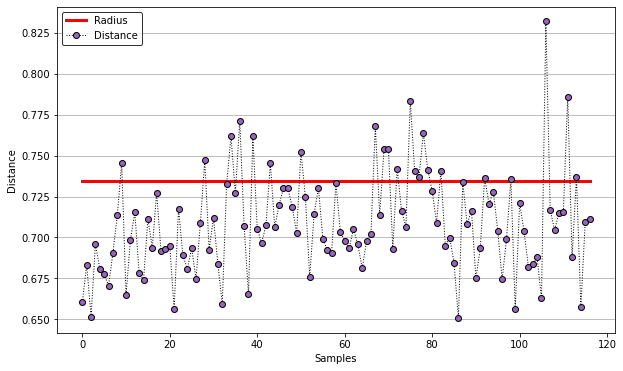

Wall time: 49.1 s


In [14]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-3), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.2187 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.3211
number of samples    = 60
number of features   = 196608
number of SVs        = 21
ratio of SVs         = 35.0000 %
accuracy             = 93.3333 %




*** Prediction of the provided data is completed. ***

running time         = 0.0781 seconds
number of samples    = 30
number of alarm      = 23
accuracy             = 76.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0625 seconds
number of samples    = 12
number of alarm      = 1
accuracy             = 91.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.1172 seconds
number of samples    = 42
number of alarm      = 24
accuracy             = 80.9524 %




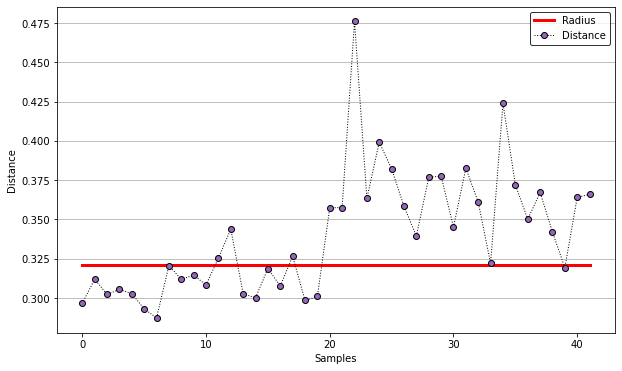



*** Fitting of the SVDD model is completed. ***

running time         = 0.1718 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.3211
number of samples    = 60
number of features   = 196608
number of SVs        = 21
ratio of SVs         = 35.0000 %
accuracy             = 93.3333 %




*** Prediction of the provided data is completed. ***

running time         = 0.0937 seconds
number of samples    = 30
number of alarm      = 23
accuracy             = 76.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0625 seconds
number of samples    = 12
number of alarm      = 1
accuracy             = 91.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.1054 seconds
number of samples    = 42
number of alarm      = 24
accuracy             = 80.9524 %




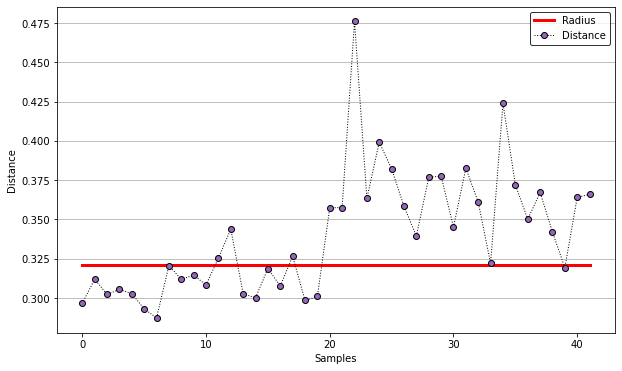



*** Fitting of the SVDD model is completed. ***

running time         = 0.1719 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.3211
number of samples    = 60
number of features   = 196608
number of SVs        = 21
ratio of SVs         = 35.0000 %
accuracy             = 93.3333 %




*** Prediction of the provided data is completed. ***

running time         = 0.0781 seconds
number of samples    = 30
number of alarm      = 23
accuracy             = 76.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0625 seconds
number of samples    = 12
number of alarm      = 1
accuracy             = 91.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.1130 seconds
number of samples    = 42
number of alarm      = 24
accuracy             = 80.9524 %




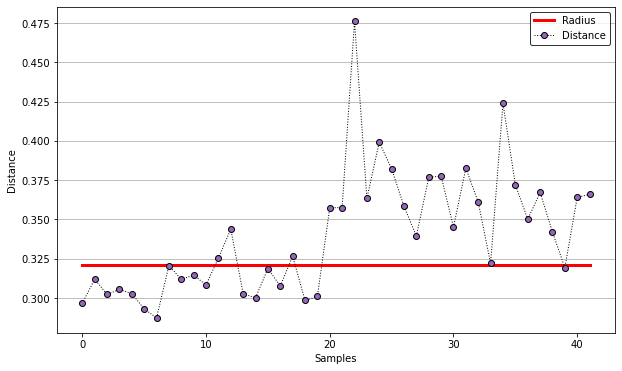



*** Fitting of the SVDD model is completed. ***

running time         = 0.1718 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.3211
number of samples    = 60
number of features   = 196608
number of SVs        = 21
ratio of SVs         = 35.0000 %
accuracy             = 93.3333 %




*** Prediction of the provided data is completed. ***

running time         = 0.0937 seconds
number of samples    = 30
number of alarm      = 23
accuracy             = 76.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0469 seconds
number of samples    = 12
number of alarm      = 1
accuracy             = 91.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.1067 seconds
number of samples    = 42
number of alarm      = 24
accuracy             = 80.9524 %




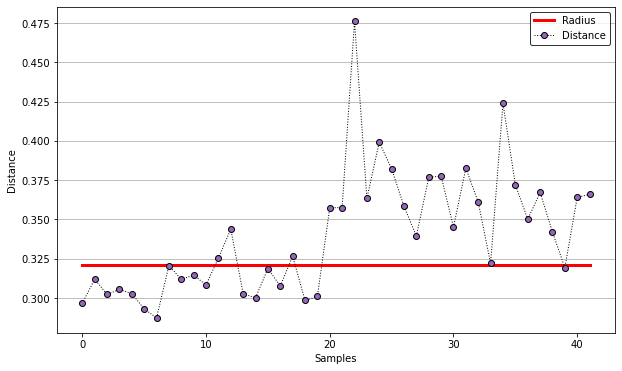



*** Fitting of the SVDD model is completed. ***

running time         = 0.1718 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.3211
number of samples    = 60
number of features   = 196608
number of SVs        = 21
ratio of SVs         = 35.0000 %
accuracy             = 93.3333 %




*** Prediction of the provided data is completed. ***

running time         = 0.0937 seconds
number of samples    = 30
number of alarm      = 23
accuracy             = 76.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0625 seconds
number of samples    = 12
number of alarm      = 1
accuracy             = 91.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.0897 seconds
number of samples    = 42
number of alarm      = 24
accuracy             = 80.9524 %




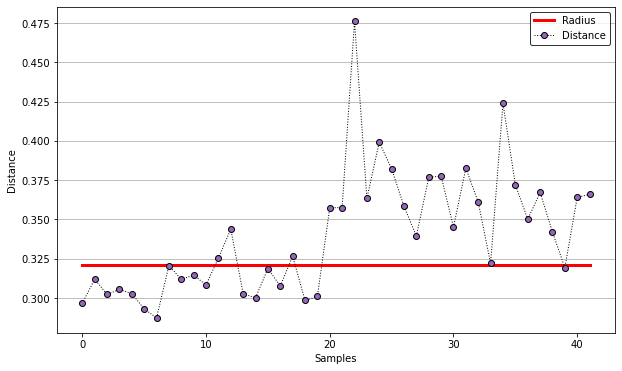

Wall time: 14.8 s


In [15]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-3), gamma=10**(-4), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.5780 seconds
kernel function      = rbf
iterations           = 10
radius               = 0.2238
number of samples    = 213
number of features   = 196608
number of SVs        = 15
ratio of SVs         = 7.0423 %
accuracy             = 93.4272 %




*** Prediction of the provided data is completed. ***

running time         = 0.2288 seconds
number of samples    = 40
number of alarm      = 15
accuracy             = 37.5000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2503 seconds
number of samples    = 60
number of alarm      = 2
accuracy             = 96.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.3048 seconds
number of samples    = 100
number of alarm      = 17
accuracy             = 73.0000 %




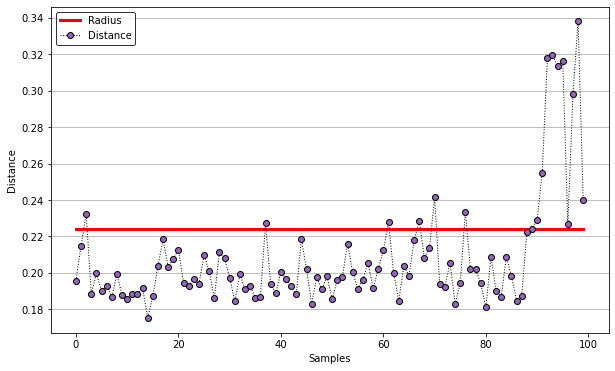



*** Fitting of the SVDD model is completed. ***

running time         = 0.6249 seconds
kernel function      = rbf
iterations           = 10
radius               = 0.2238
number of samples    = 213
number of features   = 196608
number of SVs        = 15
ratio of SVs         = 7.0423 %
accuracy             = 93.4272 %




*** Prediction of the provided data is completed. ***

running time         = 0.2218 seconds
number of samples    = 40
number of alarm      = 15
accuracy             = 37.5000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2499 seconds
number of samples    = 60
number of alarm      = 2
accuracy             = 96.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.2983 seconds
number of samples    = 100
number of alarm      = 17
accuracy             = 73.0000 %




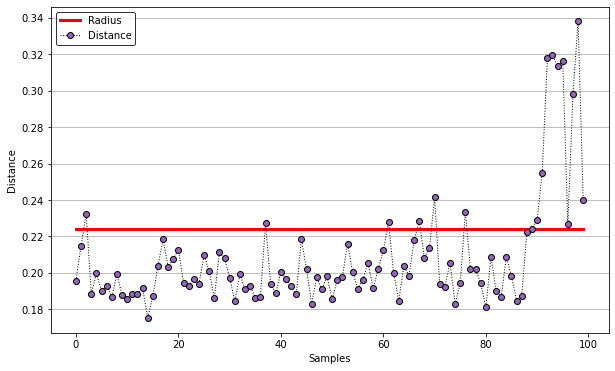



*** Fitting of the SVDD model is completed. ***

running time         = 0.5936 seconds
kernel function      = rbf
iterations           = 10
radius               = 0.2238
number of samples    = 213
number of features   = 196608
number of SVs        = 15
ratio of SVs         = 7.0423 %
accuracy             = 93.4272 %




*** Prediction of the provided data is completed. ***

running time         = 0.2326 seconds
number of samples    = 40
number of alarm      = 15
accuracy             = 37.5000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2567 seconds
number of samples    = 60
number of alarm      = 2
accuracy             = 96.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.2984 seconds
number of samples    = 100
number of alarm      = 17
accuracy             = 73.0000 %




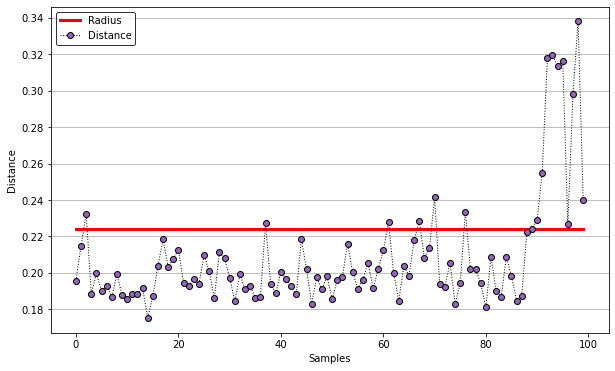



*** Fitting of the SVDD model is completed. ***

running time         = 0.6092 seconds
kernel function      = rbf
iterations           = 10
radius               = 0.2238
number of samples    = 213
number of features   = 196608
number of SVs        = 15
ratio of SVs         = 7.0423 %
accuracy             = 93.4272 %




*** Prediction of the provided data is completed. ***

running time         = 0.2318 seconds
number of samples    = 40
number of alarm      = 15
accuracy             = 37.5000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2404 seconds
number of samples    = 60
number of alarm      = 2
accuracy             = 96.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.2911 seconds
number of samples    = 100
number of alarm      = 17
accuracy             = 73.0000 %




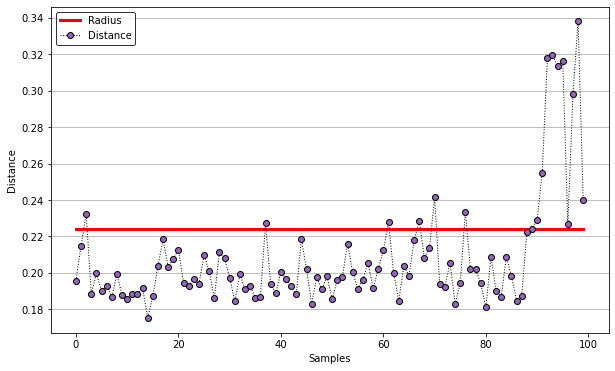



*** Fitting of the SVDD model is completed. ***

running time         = 0.6561 seconds
kernel function      = rbf
iterations           = 10
radius               = 0.2238
number of samples    = 213
number of features   = 196608
number of SVs        = 15
ratio of SVs         = 7.0423 %
accuracy             = 93.4272 %




*** Prediction of the provided data is completed. ***

running time         = 0.2214 seconds
number of samples    = 40
number of alarm      = 15
accuracy             = 37.5000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2361 seconds
number of samples    = 60
number of alarm      = 2
accuracy             = 96.6667 %




*** Prediction of the provided data is completed. ***

running time         = 0.2796 seconds
number of samples    = 100
number of alarm      = 17
accuracy             = 73.0000 %




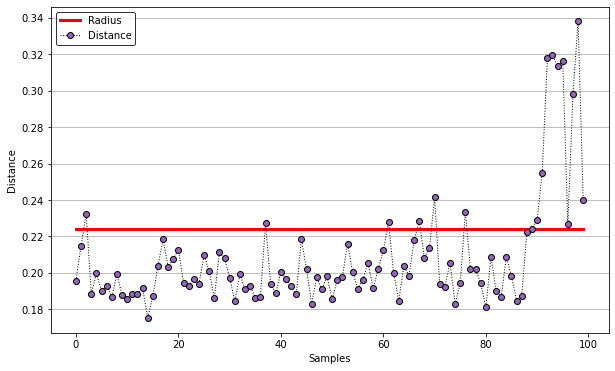

Wall time: 52.6 s


In [16]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-2), gamma=10**(-5), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)



*** Fitting of the SVDD model is completed. ***

running time         = 0.7810 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.1526
number of samples    = 247
number of features   = 196608
number of SVs        = 41
ratio of SVs         = 16.5992 %
accuracy             = 95.1417 %




*** Prediction of the provided data is completed. ***

running time         = 0.2809 seconds
number of samples    = 60
number of alarm      = 21
accuracy             = 35.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2146 seconds
number of samples    = 19
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2859 seconds
number of samples    = 79
number of alarm      = 21
accuracy             = 50.6329 %




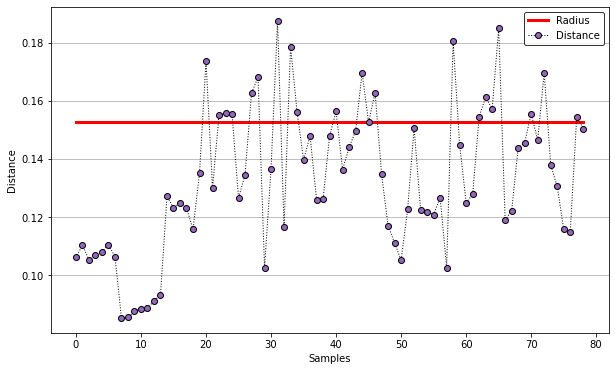



*** Fitting of the SVDD model is completed. ***

running time         = 0.7810 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.1526
number of samples    = 247
number of features   = 196608
number of SVs        = 41
ratio of SVs         = 16.5992 %
accuracy             = 95.1417 %




*** Prediction of the provided data is completed. ***

running time         = 0.2766 seconds
number of samples    = 60
number of alarm      = 21
accuracy             = 35.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2187 seconds
number of samples    = 19
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2969 seconds
number of samples    = 79
number of alarm      = 21
accuracy             = 50.6329 %




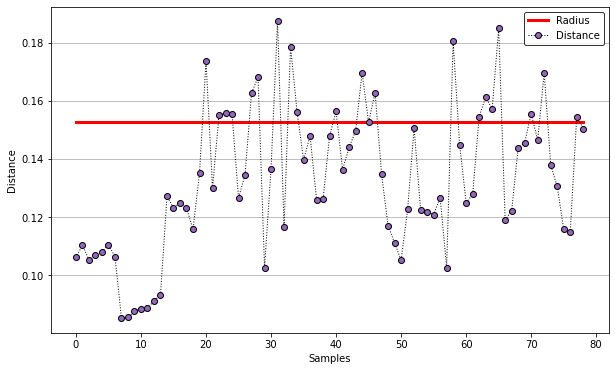



*** Fitting of the SVDD model is completed. ***

running time         = 0.7810 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.1526
number of samples    = 247
number of features   = 196608
number of SVs        = 41
ratio of SVs         = 16.5992 %
accuracy             = 95.1417 %




*** Prediction of the provided data is completed. ***

running time         = 0.2595 seconds
number of samples    = 60
number of alarm      = 21
accuracy             = 35.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2188 seconds
number of samples    = 19
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2819 seconds
number of samples    = 79
number of alarm      = 21
accuracy             = 50.6329 %




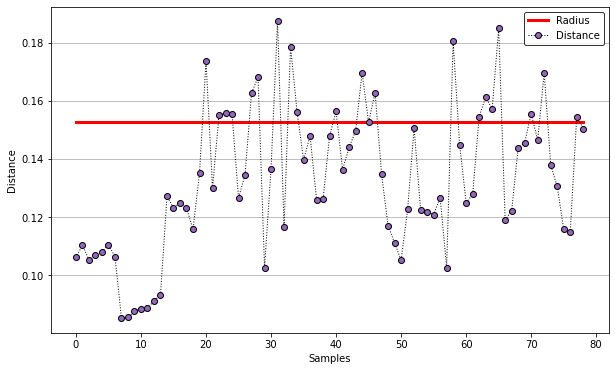



*** Fitting of the SVDD model is completed. ***

running time         = 0.7811 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.1526
number of samples    = 247
number of features   = 196608
number of SVs        = 41
ratio of SVs         = 16.5992 %
accuracy             = 95.1417 %




*** Prediction of the provided data is completed. ***

running time         = 0.2811 seconds
number of samples    = 60
number of alarm      = 21
accuracy             = 35.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2082 seconds
number of samples    = 19
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2934 seconds
number of samples    = 79
number of alarm      = 21
accuracy             = 50.6329 %




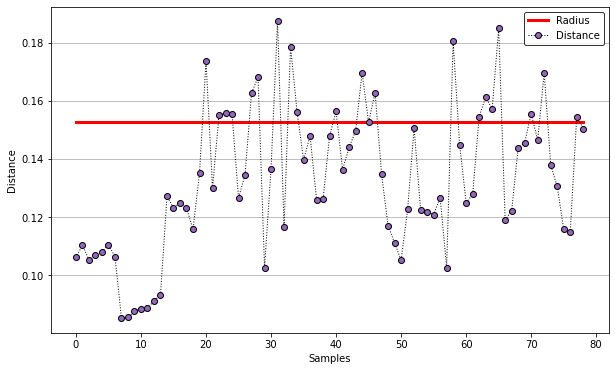



*** Fitting of the SVDD model is completed. ***

running time         = 0.7654 seconds
kernel function      = rbf
iterations           = 13
radius               = 0.1526
number of samples    = 247
number of features   = 196608
number of SVs        = 41
ratio of SVs         = 16.5992 %
accuracy             = 95.1417 %




*** Prediction of the provided data is completed. ***

running time         = 0.2677 seconds
number of samples    = 60
number of alarm      = 21
accuracy             = 35.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.2096 seconds
number of samples    = 19
number of alarm      = 0
accuracy             = 100.0000 %




*** Prediction of the provided data is completed. ***

running time         = 0.3055 seconds
number of samples    = 79
number of alarm      = 21
accuracy             = 50.6329 %




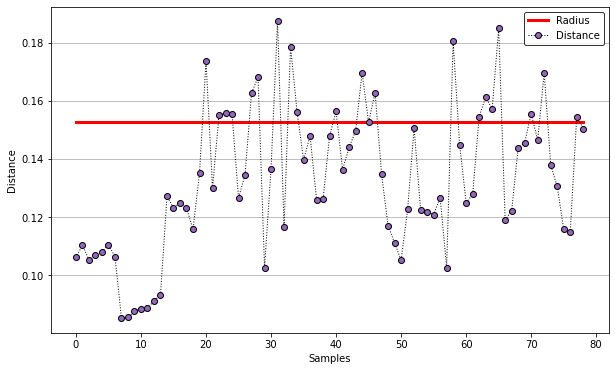

Wall time: 58 s


In [17]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-5), gamma=10**(-5), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 0.8628 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.0050
number of samples    = 240
number of features   = 196608
number of SVs        = 240
ratio of SVs         = 100.0000 %
accuracy             = 63.7500 %




*** Prediction of the provided data is completed. ***

running time         = 0.3579 seconds
number of samples    = 119
number of alarm      = 56
accuracy             = 47.0588 %




*** Prediction of the provided data is completed. ***

running time         = 0.2374 seconds
number of samples    = 32
number of alarm      = 9
accuracy             = 71.8750 %




*** Prediction of the provided data is completed. ***

running time         = 0.4414 seconds
number of samples    = 151
number of alarm      = 65
accuracy             = 52.3179 %




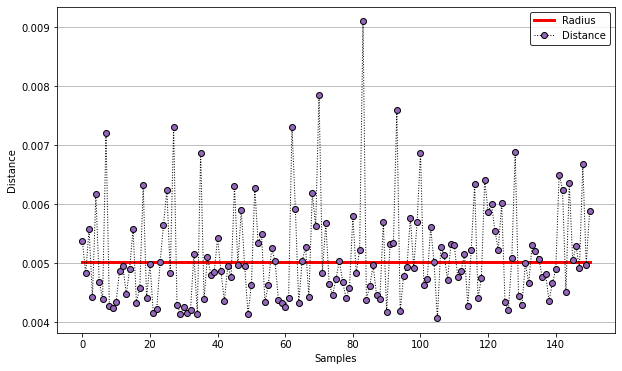

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 0.8460 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.0050
number of samples    = 240
number of features   = 196608
number of SVs        = 240
ratio of SVs         = 100.0000 %
accuracy             = 63.7500 %




*** Prediction of the provided data is completed. ***

running time         = 0.3418 seconds
number of samples    = 119
number of alarm      = 56
accuracy             = 47.0588 %




*** Prediction of the provided data is completed. ***

running time         = 0.2363 seconds
number of samples    = 32
number of alarm      = 9
accuracy             = 71.8750 %




*** Prediction of the provided data is completed. ***

running time         = 0.4080 seconds
number of samples    = 151
number of alarm      = 65
accuracy             = 52.3179 %




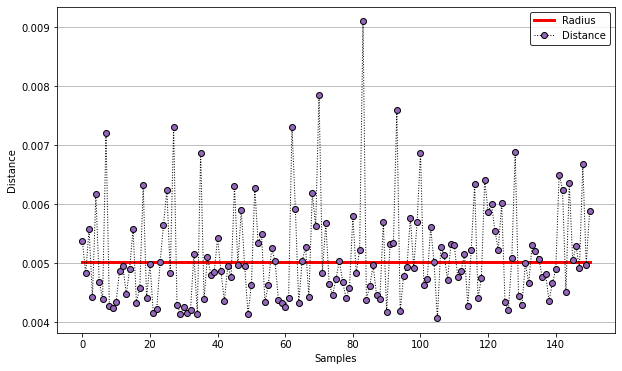

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 0.8535 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.0050
number of samples    = 240
number of features   = 196608
number of SVs        = 240
ratio of SVs         = 100.0000 %
accuracy             = 63.7500 %




*** Prediction of the provided data is completed. ***

running time         = 0.3573 seconds
number of samples    = 119
number of alarm      = 56
accuracy             = 47.0588 %




*** Prediction of the provided data is completed. ***

running time         = 0.2337 seconds
number of samples    = 32
number of alarm      = 9
accuracy             = 71.8750 %




*** Prediction of the provided data is completed. ***

running time         = 0.3991 seconds
number of samples    = 151
number of alarm      = 65
accuracy             = 52.3179 %




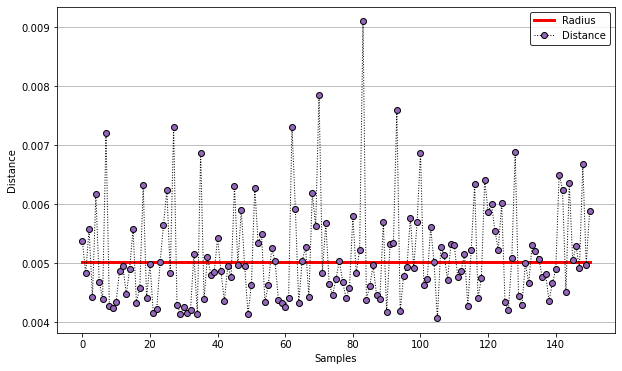

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 0.8302 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.0050
number of samples    = 240
number of features   = 196608
number of SVs        = 240
ratio of SVs         = 100.0000 %
accuracy             = 63.7500 %




*** Prediction of the provided data is completed. ***

running time         = 0.3425 seconds
number of samples    = 119
number of alarm      = 56
accuracy             = 47.0588 %




*** Prediction of the provided data is completed. ***

running time         = 0.2245 seconds
number of samples    = 32
number of alarm      = 9
accuracy             = 71.8750 %




*** Prediction of the provided data is completed. ***

running time         = 0.3882 seconds
number of samples    = 151
number of alarm      = 65
accuracy             = 52.3179 %




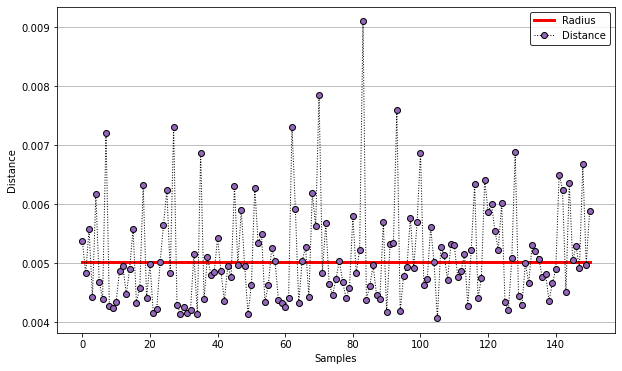

C:\Users\kitam\M_learning\M_learning\deep_svdd.py:261: UserWarning: The fitted SVDD model may be overfitting.

  warnings.warn("The fitted SVDD model may be overfitting.\n")




*** Fitting of the SVDD model is completed. ***

running time         = 0.8784 seconds
kernel function      = rbf
iterations           = 7
radius               = 0.0050
number of samples    = 240
number of features   = 196608
number of SVs        = 240
ratio of SVs         = 100.0000 %
accuracy             = 63.7500 %




*** Prediction of the provided data is completed. ***

running time         = 0.3436 seconds
number of samples    = 119
number of alarm      = 56
accuracy             = 47.0588 %




*** Prediction of the provided data is completed. ***

running time         = 0.2307 seconds
number of samples    = 32
number of alarm      = 9
accuracy             = 71.8750 %




*** Prediction of the provided data is completed. ***

running time         = 0.4000 seconds
number of samples    = 151
number of alarm      = 65
accuracy             = 52.3179 %




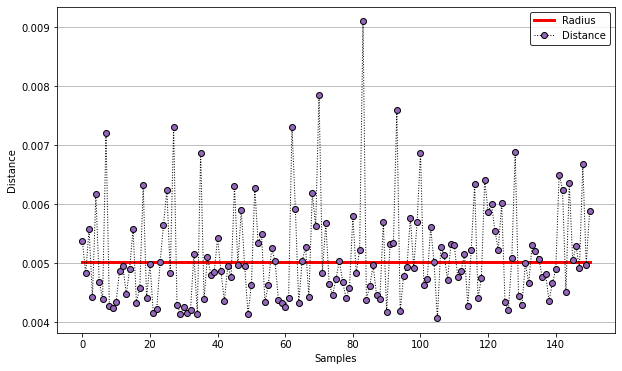

Wall time: 51.5 s


In [18]:
%%time
for num in range(5):
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.bottle()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.cable()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.capsule()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.carpet()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.grid()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.hazelnut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.leather()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.metal_nut()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.pill()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.screw()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.tile()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.toothbrush()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.transistor()
#     X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.wood()
    X_train, X_test, X_test_good, X_test_error, y_tr, y_tg, y_te, y_ts = mv.zipper()
    X_tr = X_train
    X_te = X_test_error
    X_tg = X_test_good
    X_ts = X_test
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
    x_ts = np.reshape(X_ts,(X_ts.shape[0], X_ts.shape[1]*X_ts.shape[2]*X_ts.shape[3]))

    svdd = BaseSVDD(C=2**(-7), gamma=10**(-8), kernel='rbf', display='on')
    svdd.fit(x_tr)
    svdd.predict(x_te, y_te)
    acc.append(svdd.accuracy)
    svdd.predict(x_tg, y_tg)
    acc.append(svdd.accuracy)
    svdd.predict(x_ts, y_ts)
    acc.append(svdd.accuracy)
    radius = svdd.radius
    distance = svdd.get_distance(x_ts)
    svdd.plot_distance(radius, distance)

In [24]:
a = acc

In [25]:
a = np.array(a)
a=a*100
a= a.reshape(75,3)
a.shape
df = pd.DataFrame(a)
print(df)
df.to_csv('output_pd.csv')

            0       1          2
0   98.412698  90.000  96.385542
1   98.412698  90.000  96.385542
2   98.412698  95.000  97.590361
3   98.412698  90.000  96.385542
4   98.412698  90.000  96.385542
..        ...     ...        ...
70  90.756303  68.750  86.092715
71  84.873950  81.250  84.105960
72  90.756303  78.125  88.079470
73  90.756303  68.750  86.092715
74  92.436975  71.875  88.079470

[75 rows x 3 columns]
